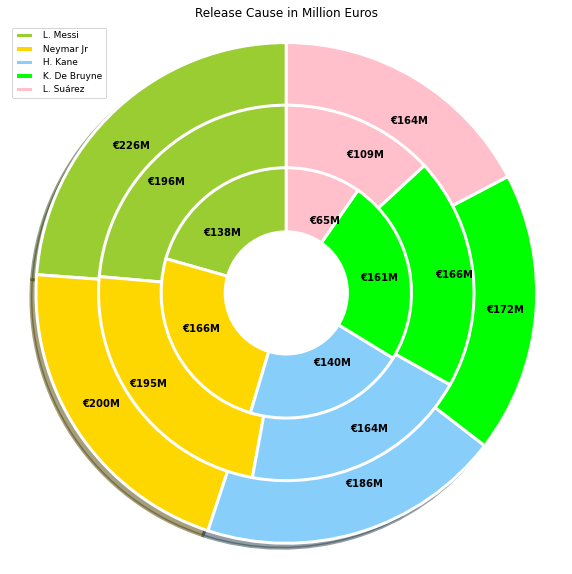

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as tck
pd.set_option('display.max_row',None)
a=pd.read_csv("FIFA19_official_data.csv",usecols=['Name','Release Clause'],nrows=100)
b=pd.read_csv("FIFA20_official_data.csv",usecols=['Name','Release Clause'],nrows=100)
c=pd.read_csv("FIFA21_official_data.csv",usecols=['Name','Release Clause'],nrows=100)
a.dropna(how='any',inplace=True)
b.dropna(how='any',inplace=True)
c.dropna(how='any',inplace=True)
a['Release Clause']=a['Release Clause'].str.replace('M','').str.replace('€','').astype('float').round(decimals=0)
b['Release Clause']=b['Release Clause'].str.replace('M','').str.replace('€','').astype('float').round(decimals=0)
c['Release Clause']=c['Release Clause'].str.replace('M','').str.replace('€','').astype('float').round(decimals=0)
a.rename(columns={'Release Clause':'Release Clause 19'},inplace=True)
b.rename(columns={'Release Clause':'Release Clause 20'},inplace=True)
c.rename(columns={'Release Clause':'Release Clause 21'},inplace=True)
d=pd.merge(a,b,left_on='Name',right_on='Name')
df=pd.DataFrame(pd.merge(d,c,left_on='Name',right_on='Name'))
df['Release Clause 19']=df['Release Clause 19'].astype('int')
df['Release Clause 20']=df['Release Clause 20'].astype('int')
df['Release Clause 21']=df['Release Clause 21'].astype('int')
df.sort_values(by=['Release Clause 19','Release Clause 20','Release Clause 21'],ascending=False,inplace=True)
df=df.iloc[0:5]
plt.rcParams['figure.figsize'] = (10,10)
fg,ax=plt.subplots()
label1=df['Release Clause 19'].astype('str').apply(lambda x:'€'+x+'M')
label2=df['Release Clause 20'].astype('str').apply(lambda x:'€'+x+'M')
label3=df['Release Clause 21'].astype('str').apply(lambda x:'€'+x+'M')


colors=['yellowgreen','gold','lightskyblue','lime','pink']
ax.pie(df['Release Clause 19'],radius=1,startangle=90,labels=label1,pctdistance=0.88,shadow=True
       ,colors=colors,labeldistance=0.8
       ,textprops={'fontweight':'bold','fontsize':10},wedgeprops={'linewidth':3,'edgecolor':'white'})

ax.pie(df['Release Clause 20'],radius=0.75,startangle=90,labels=label2
       ,colors=colors,labeldistance=0.8,pctdistance=0.85
       ,textprops={'fontweight':'bold','fontsize':10},wedgeprops={'linewidth':3,'edgecolor':'white'})


ax.pie(df['Release Clause 21'],radius=0.5,startangle=90,labels=label3
       ,colors=colors,labeldistance=0.6,pctdistance=0.6
       ,textprops={'fontweight':'bold','fontsize':10},wedgeprops={'linewidth':3,'edgecolor':'white'})

plt.legend(df['Name'],loc='upper left',fontsize=9)
cc=plt.Circle((0,0),0.25,fc='white')
fg.gca().add_artist(cc)
plt.title('Release Cause in Million Euros')
plt.axis('equal')
plt.show()


